# 맵플롯립 Matplotlib

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 지원 되는 플롯 유형

- 선그래프(line plot) : plot()
- 막대그래프(bar chart) : bar()
- 산점도(scatter plot) : scatter() 
- 히스토그램(histogram) : hist()
- 상자그림표(box plot) : boxplot()
- 원그래프(pie chart) : pie()
- 기타 다양한 유형의 차트/플롯을 지원 : 관련 홈페이지 참고
     - https://matplotlib.org/stable/plot_types/index.html
     - https://matplotlib.org/stable/gallery/index.html

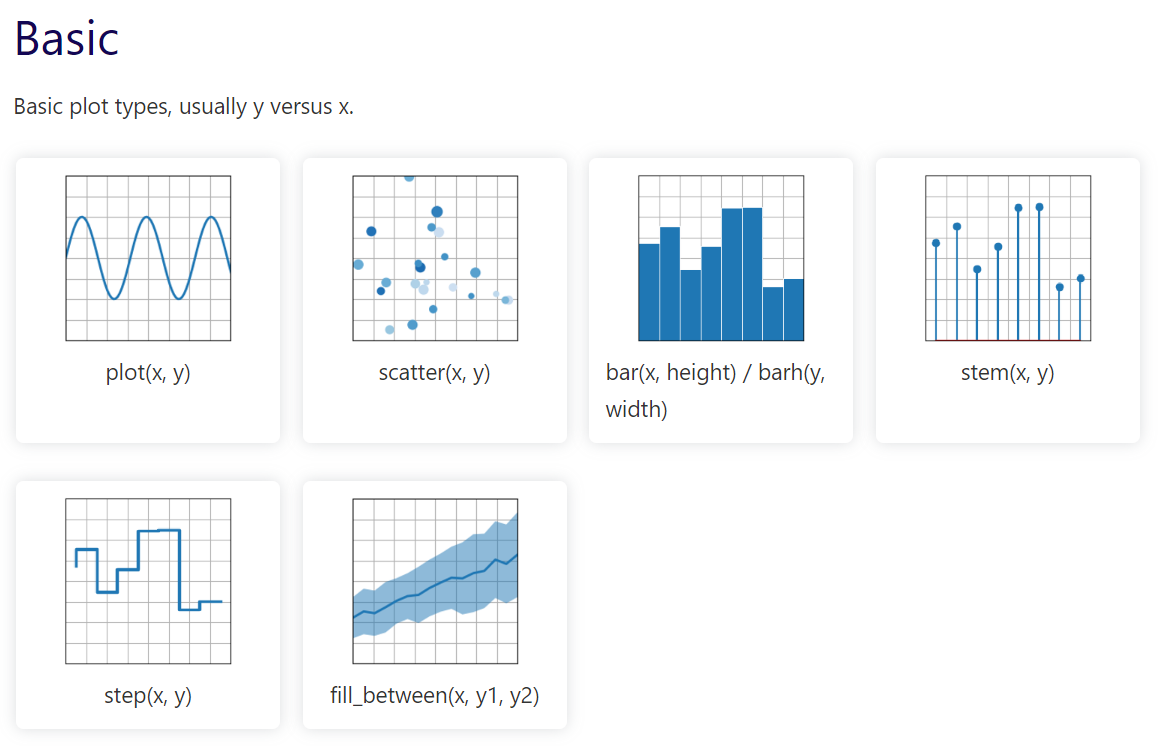
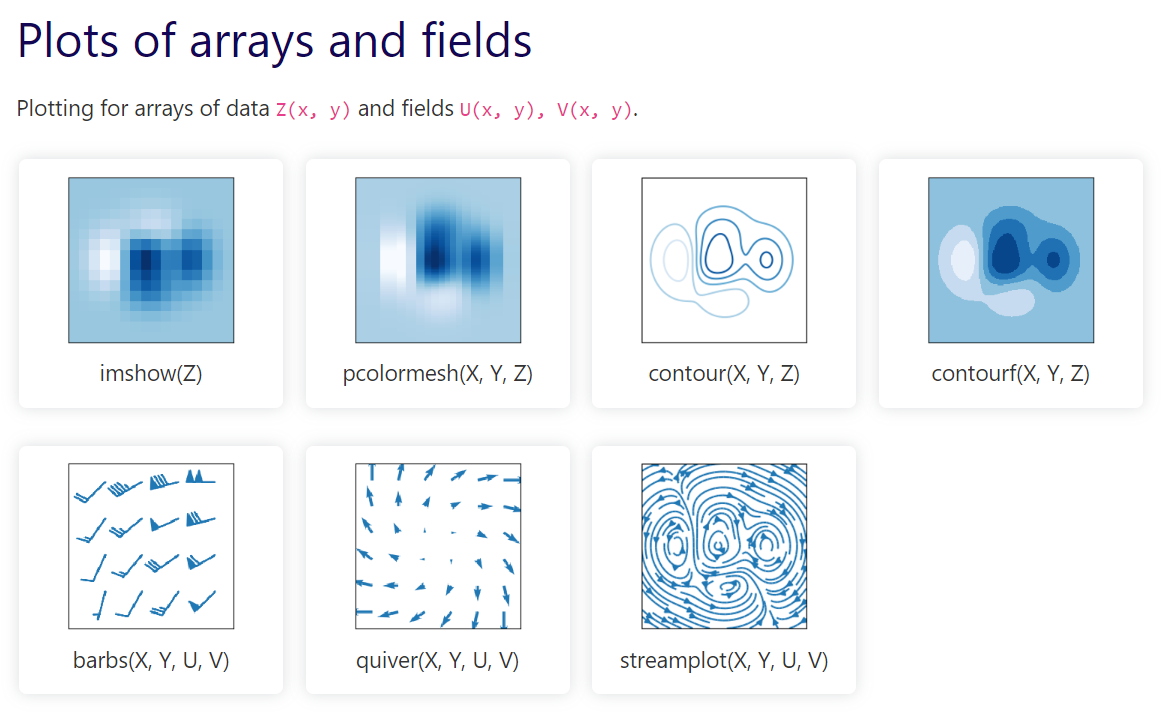
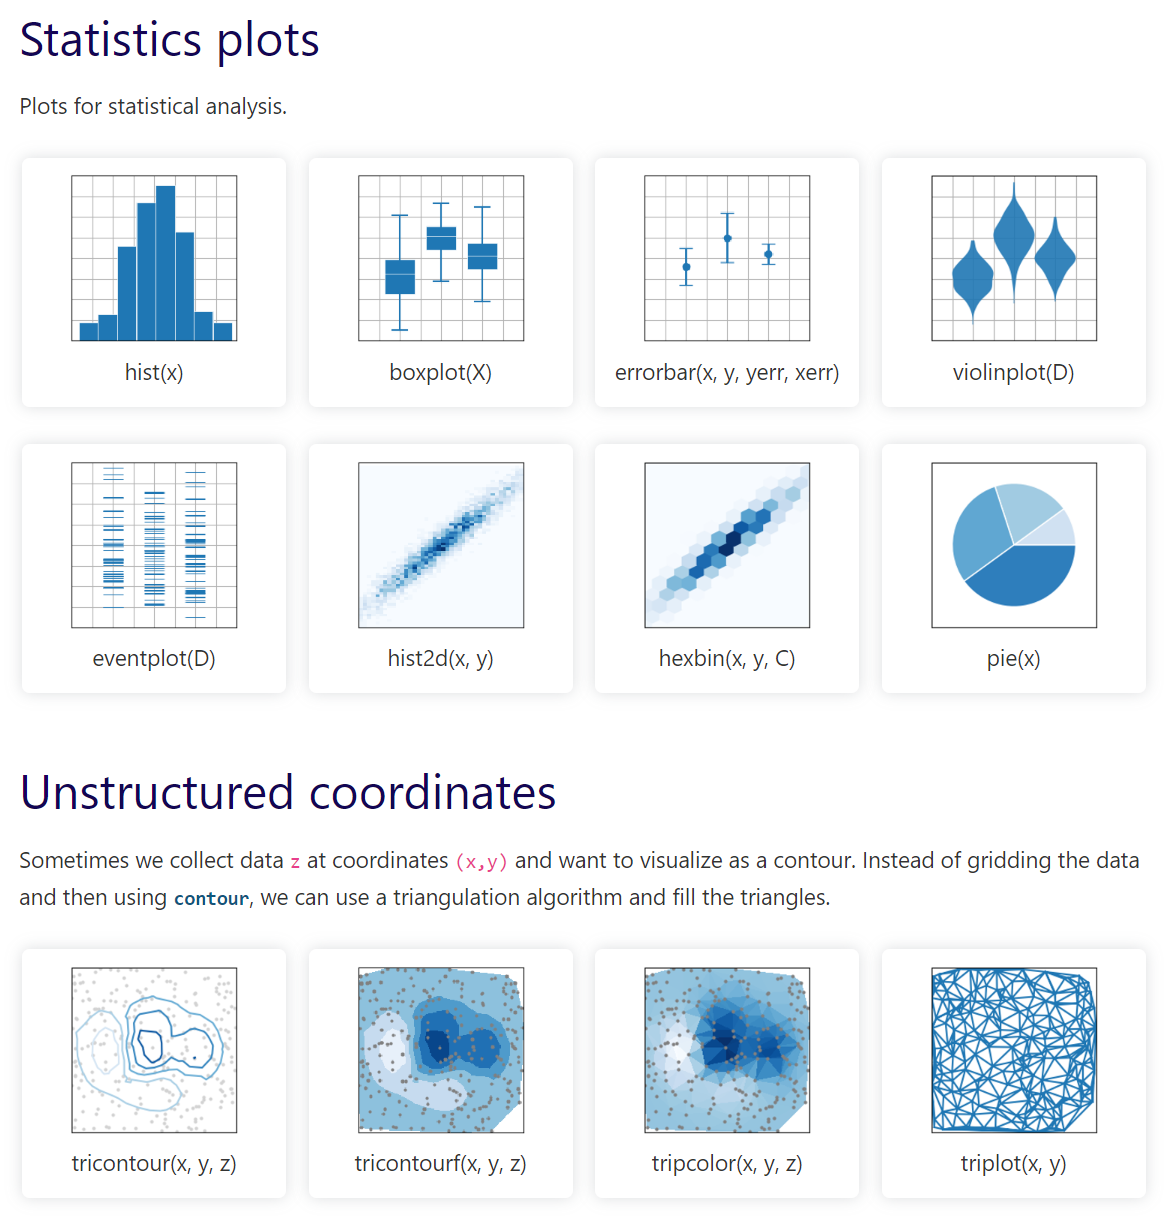

## 1. 막대그래프 : bar(), barh(), df.plot()

### 1-1. 세로 막대 그래프 그리기: bar()
- bar(x,y,color=[],alpha=)
    - color = [] : 색상값 설정
    - alpha = 투명도 설정
    
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

#### 데이터셋

In [4]:
y = [2,3,1,6]
x = np.arange(len(y))

y1 = [2,3]
x1 = [0,1]

y2 = [1,6]
x2 = [2,3]

xlabel=['가','나','다','라']

#### 막대그래프

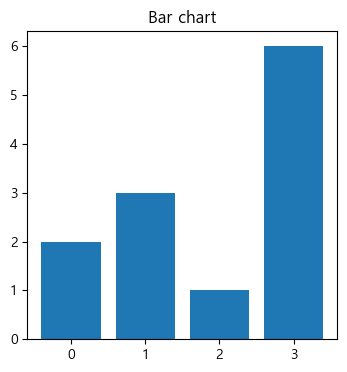

In [5]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.show()

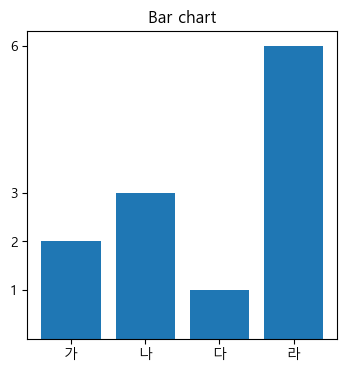

In [6]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.show()

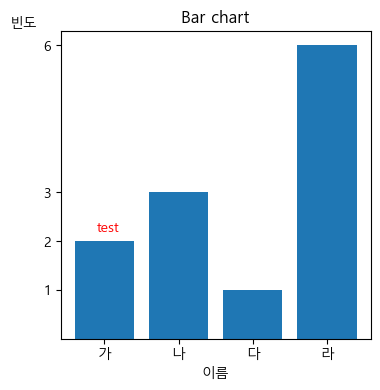

In [7]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.xlabel('이름')
plt.yticks(sorted(y))
plt.ylabel('빈도', rotation=0, loc='top')
plt.text(-0.1, 2.2, 'test', color='r')
plt.show()

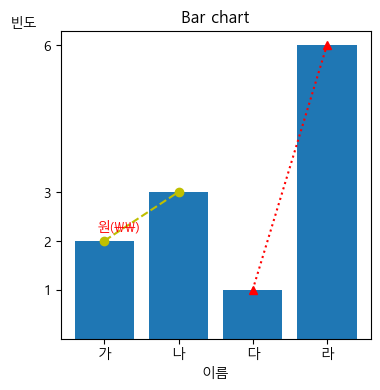

In [8]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.xlabel('이름')
plt.yticks(sorted(y))
plt.ylabel('빈도', rotation=0, loc='top')
plt.text(-0.1, 2.2, r'원(\\)', color='r')

plt.plot(x1,y1, c='y', ls='--', marker='o')
plt.plot(x2,y2, c='r', ls=':', marker='^')

plt.show()

### 1-2. 가로 막대 그래프 그리기 : barh()

- barh(x,y,color=[], alpha=)

#### 데이터셋

In [9]:
np.random.seed(0)
people = ['몽룡','춘향','방자','향단']
x = np.arange(len(people))
sat = 3 + 10*np.random.rand(len(people))

#### 가로막대그래프

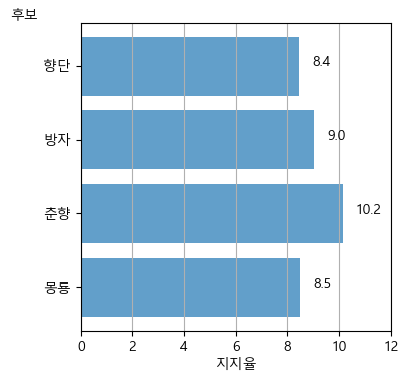

In [10]:
plt.figure(figsize=(4,4))
plt.barh(x, sat, alpha=0.7)
plt.yticks(x, people)
plt.xlim(0,12)
for i in range(len(people)):
    plt.text(sat[i]+0.5 ,i, np.round(sat[i],1))
plt.xlabel('지지율')
plt.ylabel('후보', rotation = 0, loc='top')
plt.grid(axis='x')
plt.show()

### 1-3. 데이터프레임으로 막대그래프 그리기

- **데이터프레임.plot**(kind=그래프종류, grid=T/F, figsize=그래프크기)
- **plt.bar**(데이터프레임.변수1, 데이터프레임.변수2)

**데이터프레임.plot()으로 막대그래프 그리기**

- plt.xticks()의 rotation 인수에 따라 가로형 또는 세로형 막대그래프 생성
    - plt.xticks(ticks=None, labels=None, **kwargs)
    - plt.xticks(ticks=None, labels=None) : vertical 기본
    - plt.xticks(ticks=None, labels=None, rotation='vertical') : 가로형막대
    - plt.xticks(ticks=None, labels=None, rotation='horizontal') : 세로형막대

#### 데이터셋

In [11]:
df = pd.DataFrame({'나이':[15, 20, 17, 50, 2, 30, 23],
                  '이름':['둘리', '도우너','또치','길동','희동','마이콜','영희']})
df

,나이,이름
0,15,둘리
1,20,도우너
2,17,또치
3,50,길동
4,2,희동
5,30,마이콜
6,23,영희


#### 막대그래프

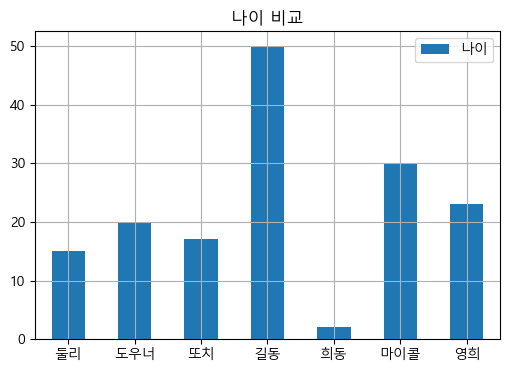

In [12]:
df.plot(kind='bar', grid=True, figsize=(6,4))
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.title('나이 비교')
plt.show()

**데이터프레임.plot()를 이용하여 묶음 막대그래프 그리기**
- 그래프를 그리기 위한 데이터를 지정하지 않는 경우
- 데이터프레임에 있는 모든 수치데이터를 이용하여 묶음 막대그래프를 그림

#### 데이터셋

In [13]:
df = pd.DataFrame({'국어':[150, 200, 170, 150, 120, 130, 200],
                   '영어':[150,130,140,150,100,170,160],
                  '이름':['둘리', '도우너','또치','길동','희동','마이콜','영희']})
df

,국어,영어,이름
0,150,150,둘리
1,200,130,도우너
2,170,140,또치
3,150,150,길동
4,120,100,희동
5,130,170,마이콜
6,200,160,영희


#### 묶음 막대그래프

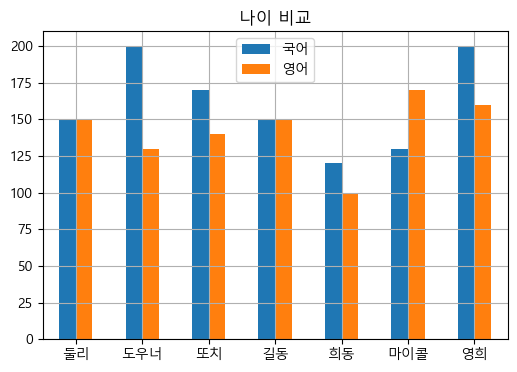

In [14]:
df.plot(kind='bar', grid=True, figsize=(6,4))
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.title('나이 비교')
plt.show()

**plt.bar(데이터프레임)를 이용하여 막대그래프 그리기**

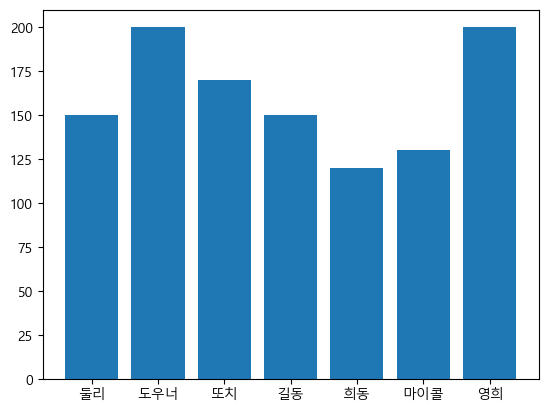

In [15]:
plt.bar(df.이름, df.국어)
plt.show()

**데이터프레임의 일부 필드를 데이터프레임으로 추출하여 그래프 작성**

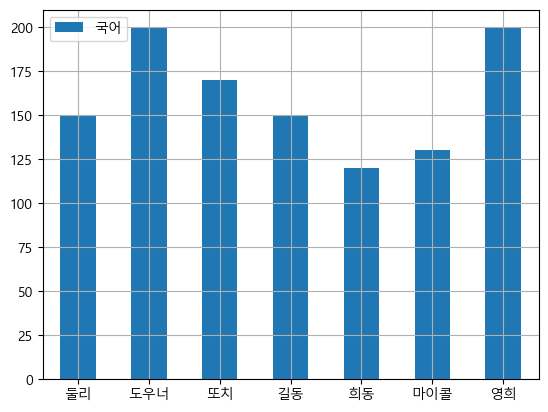

In [16]:
df['국어'].plot(kind='bar')
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.legend()
plt.grid()
plt.show()

**정렬된 데이터를 이용하여 막대그래프 그리기**

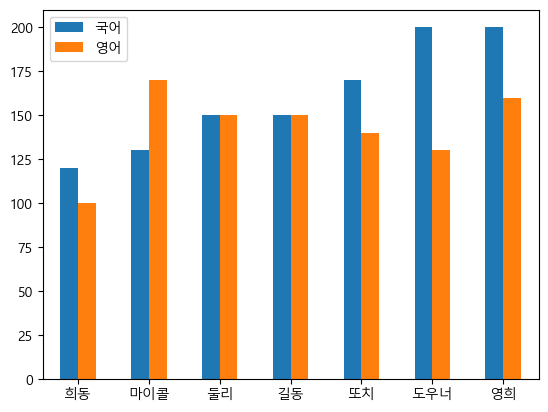

In [17]:
df2 = df.sort_values('국어')
df2

df2.plot(kind='bar')
plt.xticks(np.arange(df2.shape[0]), df2.이름, rotation=0)
plt.show()

## 2. 산점도(scatter plot) : scatter()

- 두 수치형 변수간의 관계를 나타내기 위해 사용하는 그래프
    - 상관관계 표현 : 선형성

In [18]:
x = np.arange(10)
y = np.array([9,8,7,9,8,3,2,4,3,4])

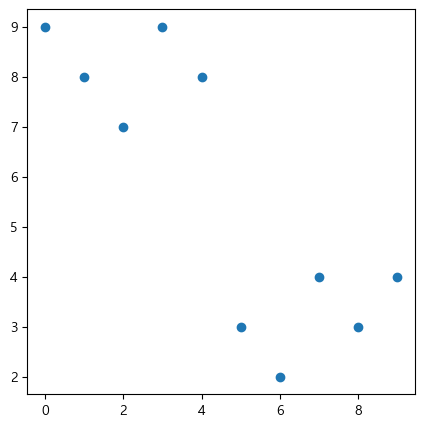

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.show()

### 산점도의 marker 변경

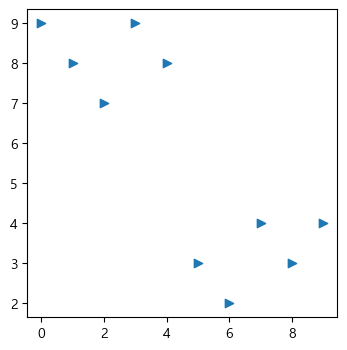

In [20]:
plt.figure(figsize=(4,4))
plt.scatter(x,y,marker='>')
plt.show()

### 버블차트
- 점의 크기와 색상을 이용하여 서로 다른 데이터 값을 표시하는 그래프
- scatter(c, s)를 이용하여 작성
    - s 인수 : size
    - c 인수 : color

In [21]:
n = 30
np.random.seed(0)
x=np.random.rand(n)
y1 = np.random.rand(n)
y2 = np.random.rand(n)
y3 = np.pi*(np.random.rand(n)*15)**2

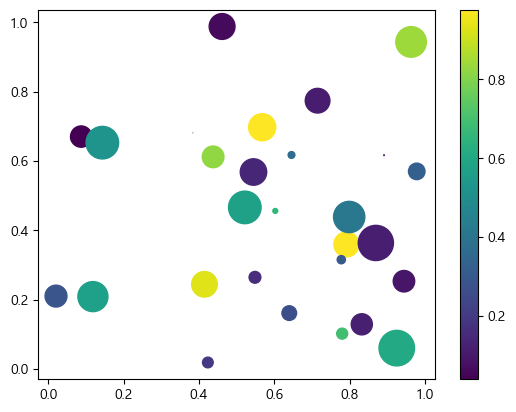

In [22]:
plt.scatter(x,y1,c=y2, s=y3)
plt.colorbar()
plt.show()

### 산점도에 colorbar() 적용

- 산점도를 그린 후 colorbar()를 생성하여 색상 정보를 막대로 표현

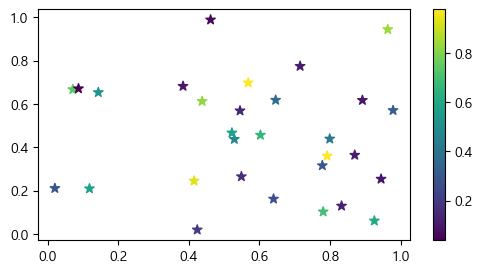

In [23]:
plt.figure(figsize=(6,3))
plt.scatter(x,y1,s=50, c=y2, marker='*')
plt.colorbar()
plt.show()

## 3. 히스토그램 : hist()

- 연속형 수치형 데이터의 분포 시각화
- 참고. 막대그래프는 범주형 데이터의 빈도(비율) 분포 시각화

In [31]:
import numpy as np

np.random .seed(10)
x = np.random.randn(1000)

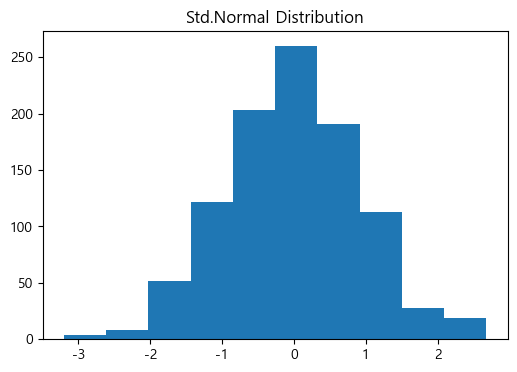

In [32]:
plt.figure(figsize=(6,4))
plt.title('Std.Normal Distribution')
plt.hist(x)
plt.show()

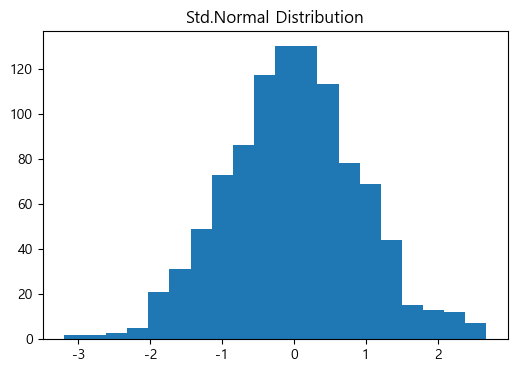

In [36]:
plt.figure(figsize=(6,4))
plt.title('Std.Normal Distribution')
plt.hist(x, bins=20)
plt.show()

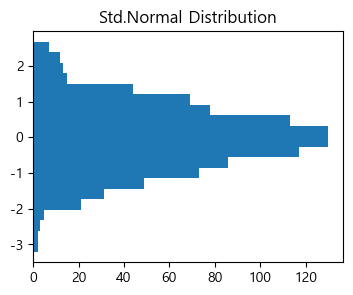

In [37]:
plt.figure(figsize=(4,3))
plt.title('Std.Normal Distribution')
plt.hist(x, bins=20, orientation = 'horizontal')
plt.show()

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('data/auto_mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [42]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'accel', 'model_year', 'origin', 'name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,accel,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   accel         398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


df.horsepower.unique()
df.horsepower.replace({'?':np.nan}, inplace = True)

In [46]:
df.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

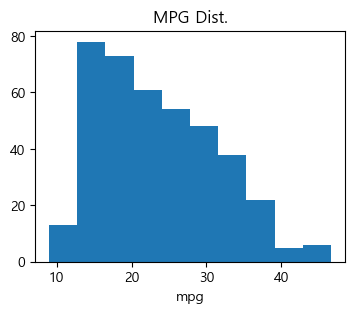

In [47]:
plt.figure(figsize=(4,3))
plt.title('MPG Dist.')
plt.hist(df.mpg)
plt.xlabel('mpg')

plt.show()

#### auto-mpg 데이터셋에서 'mpg', 'cylinders', 'displacement', 'weight' 4개 변수에 대한 히스토그램을 한 그림에 그리기

In [50]:
df.columns[[0,1,2,4]]

Index(['mpg', 'cylinders', 'displacement', 'weight'], dtype='object')

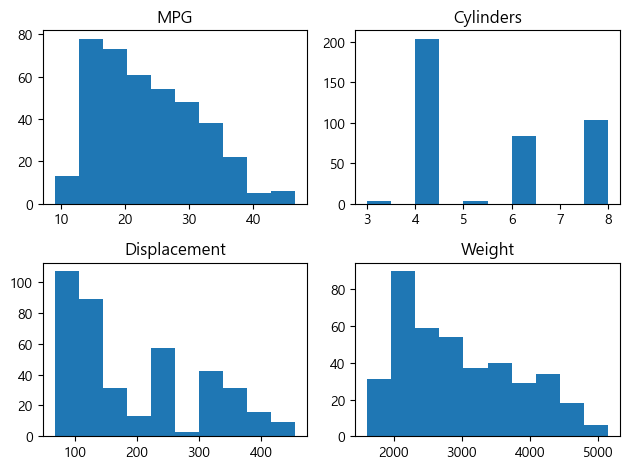

In [75]:
fig, axs = plt.subplots(2,2)

axs[0,0].hist(df.mpg)
axs[0,0].set_title('MPG')

axs[0,1].hist(df.cylinders)
axs[0,1].set_title('Cylinders')

axs[1,0].hist(df.displacement)
axs[1,0].set_title('Displacement')

axs[1,1].hist(df.weight)
axs[1,1].set_title('Weight')

plt.tight_layout()
plt.show()

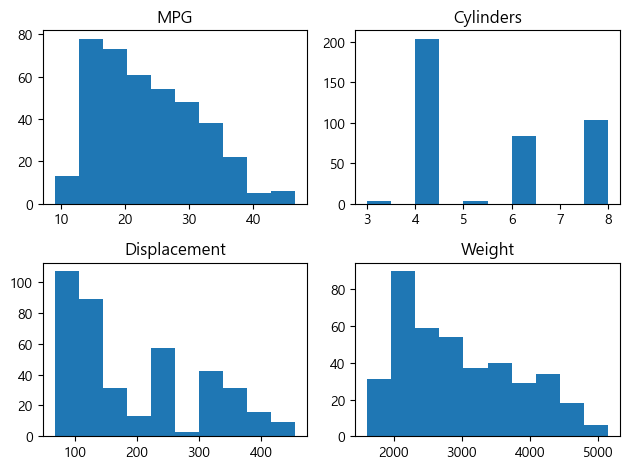

In [67]:
plt.subplot(221)
plt.hist(df.mpg)
plt.title('MPG')

plt.subplot(222)
plt.hist(df.cylinders)
plt.title('Cylinders')

plt.subplot(223)
plt.hist(df.displacement)
plt.title('Displacement')

plt.subplot(224)
plt.hist(df.weight)
plt.title('Weight')

plt.tight_layout()
plt.show()

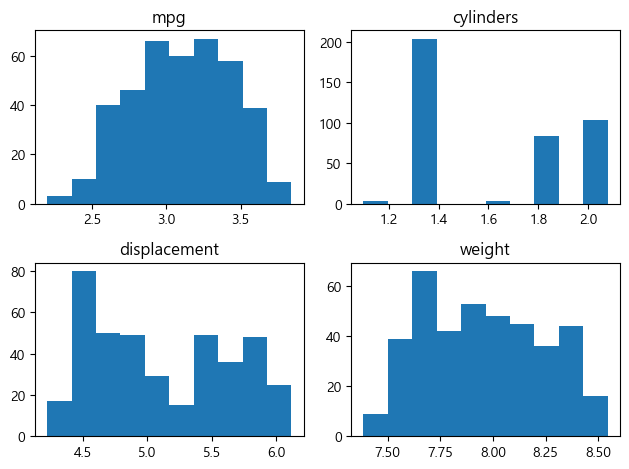

In [94]:
# 강사님 코드
# log화 -> 정규분표에 가깝게..?

cols = df.columns[[0,1,2,4]]
fig, axs = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        col = cols[2*i + j]
        axs[i,j].hist(np.log(df[col]))
        axs[i,j].set_title(col)
       
plt.tight_layout()    
plt.show()

# 함수를 정의해서 사용하면 편함!!!

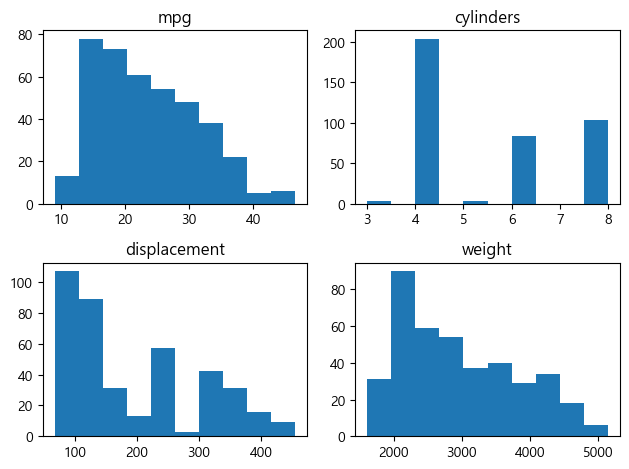

In [99]:
# 강사님 코드 응용

cols = df.columns[[0,1,2,4]]

for i in range(1,5) :
    col = cols[i-1]
    plt.subplot(2,2,i)
    plt.hist(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## 4. 박스플롯 : boxplot()

- 데이터의 분포를 파악해주는 플롯
    - 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
    
- 이상치 데이터 탐색을 위해 사용

In [98]:
df[cols].describe()

,mpg,cylinders,displacement,weight
count,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623
std,7.815984,1.701004,104.269838,846.841774
min,9.000000,3.000000,68.000000,1613.000000
25%,17.500000,4.000000,104.250000,2223.750000
50%,23.000000,4.000000,148.500000,2803.500000
75%,29.000000,8.000000,262.000000,3608.000000
max,46.600000,8.000000,455.000000,5140.000000


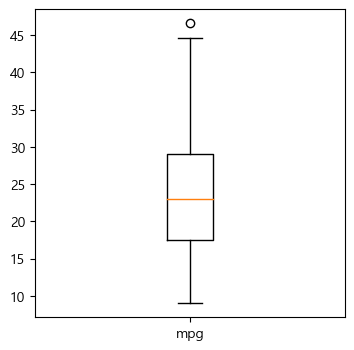

In [106]:
plt.figure(figsize=(4,4))
plt.boxplot(df.mpg)
plt.xticks([1],['mpg'])
plt.show()

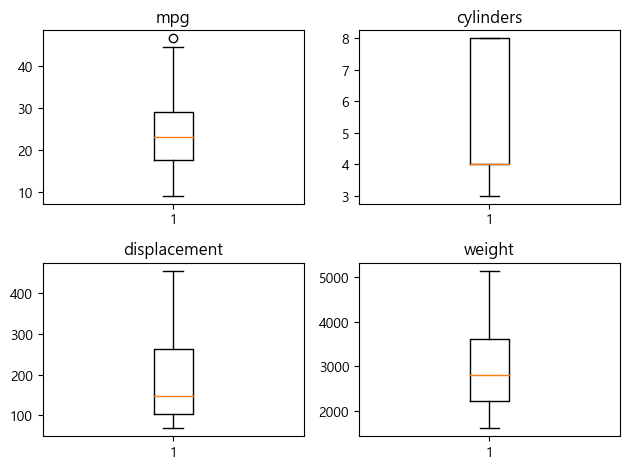

In [112]:
cols = df.columns[[0,1,2,4]]
fig, axs = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        col = cols[2*i + j]
        axs[i,j].boxplot(df[col])
        axs[i,j].set_title(col)
#         plt.xticks([1],[col])
       
plt.tight_layout()    
plt.show()

In [113]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

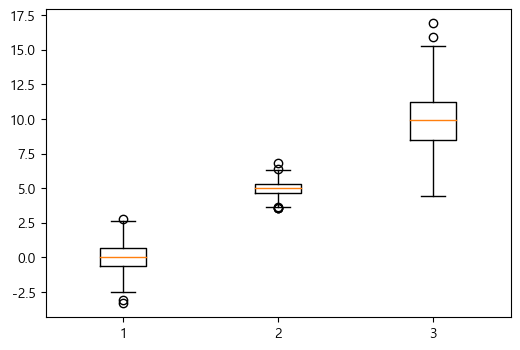

In [118]:
# 하나의 그림 안에 여러개의 박스 플롯 그리기 : 튜플형태
plt.figure(figsize=(6,4))
plt.boxplot((s1,s2,s3))
plt.show()

Text(0.5, 1.0, 's3')

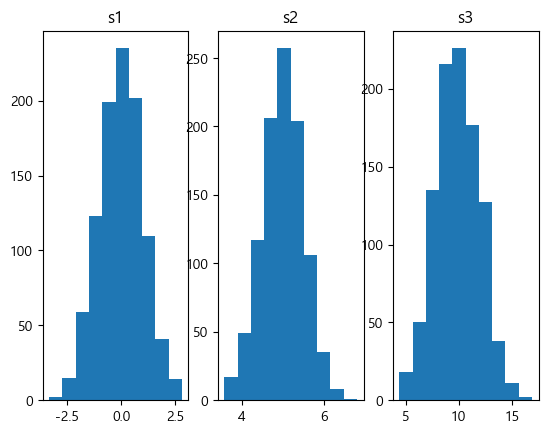

In [122]:
fig, axs = plt.subplots(1,3)

axs[0].hist(s1)
axs[0].set_title('s1')

axs[1].hist(s2)
axs[1].set_title('s2')

axs[2].hist(s3)
axs[2].set_title('s3')

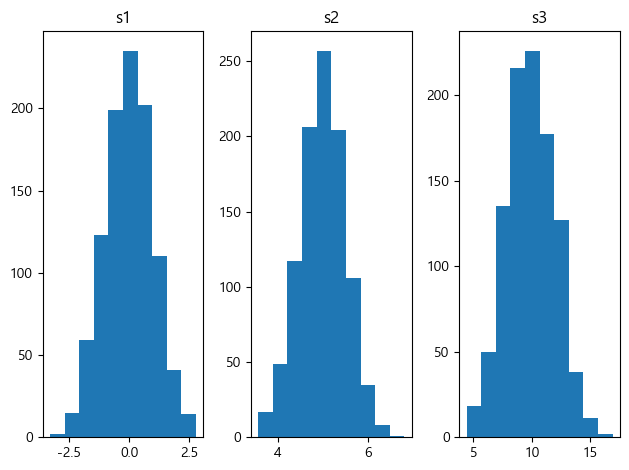

In [137]:
fig, axs = plt.subplots(1,3)
s_list = [s1, s2, s3]

for i in range(3):
    axs[i].hist(s_list[i])
    axs[i].set_title(f's{i+1}')
       
plt.tight_layout()    
plt.show()

In [128]:
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

#### origin의 값에 따른 mpg의 박스플롯

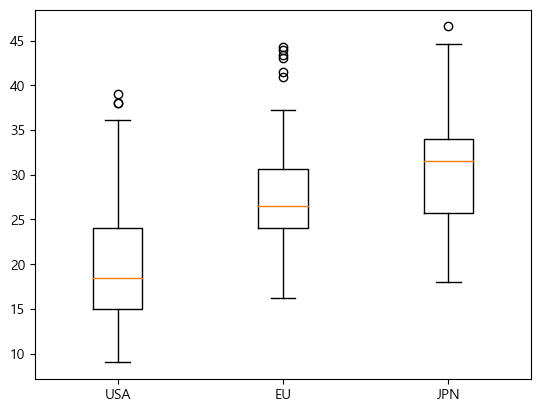

In [134]:
plt.boxplot([df[df.origin==1].mpg, 
             df[df.origin==2].mpg, 
             df[df.origin==3].mpg],
             labels=['USA','EU','JPN'])
plt.show()

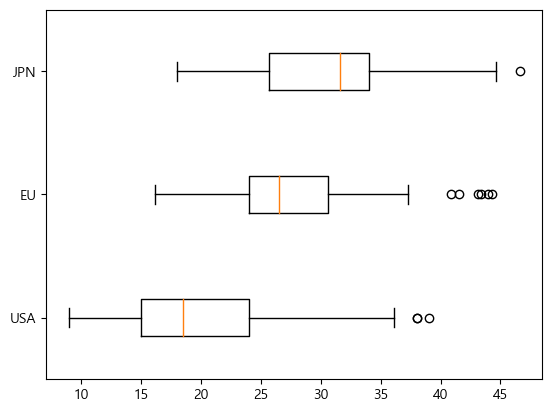

In [138]:
plt.boxplot([df[df.origin==1].mpg, 
             df[df.origin==2].mpg, 
             df[df.origin==3].mpg],
             labels=['USA','EU','JPN'],
           vert=False)
plt.show()

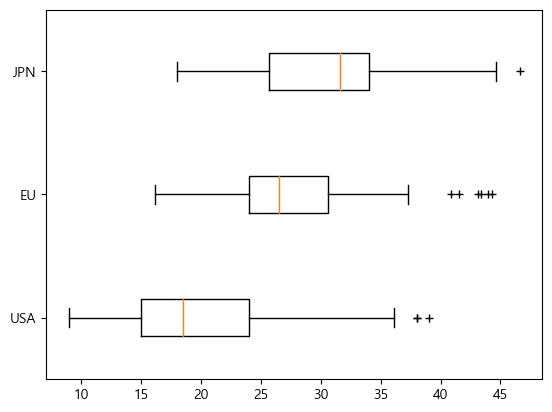

In [140]:
# sym : 아웃라이어 모양
plt.boxplot([df[df.origin==1].mpg, 
             df[df.origin==2].mpg, 
             df[df.origin==3].mpg],
             labels=['USA','EU','JPN'],
           vert=False, sym='+')
plt.show()

#### origin의 값에 따른 weight의 박스플롯과 displacement의 박스플롯 한 그림 내에 그리기

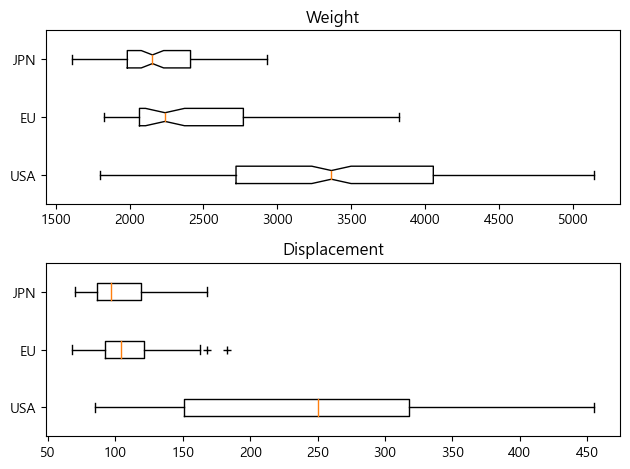

In [159]:
fig, axs = plt.subplots(2,1)

axs[0].boxplot([df[df.origin==1].weight, 
             df[df.origin==2].weight, 
             df[df.origin==3].weight],
             labels=['USA','EU','JPN'], notch=True,
           vert=False, sym='+')
axs[0].set_title('Weight')

axs[1].boxplot([df[df.origin==1].displacement, 
             df[df.origin==2].displacement, 
             df[df.origin==3].displacement],
             labels=['USA','EU','JPN'],
           vert=False, sym='+')
axs[1].set_title('Displacement')

plt.tight_layout()
plt.show()

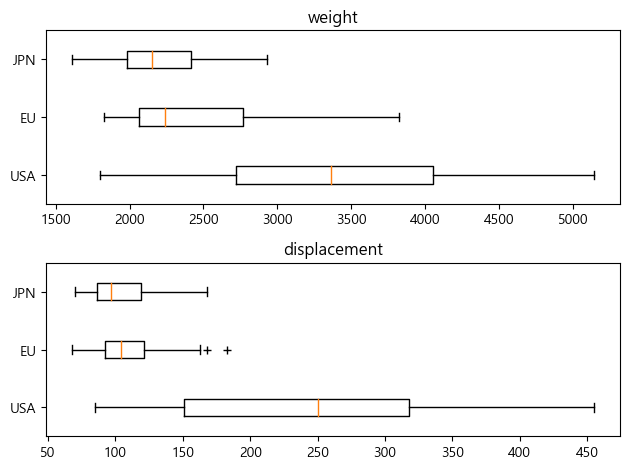

In [154]:
fig, axs = plt.subplots(2,1)
cols = ['weight', 'displacement']

for i in range(2) :
    axs[i].boxplot([df[df.origin==1][cols[i]], 
                 df[df.origin==2][cols[i]], 
                 df[df.origin==3][cols[i]]],
                 labels=['USA','EU','JPN'],
               vert=False, sym='+')
    axs[i].set_title(cols[i])


plt.tight_layout()
plt.show()

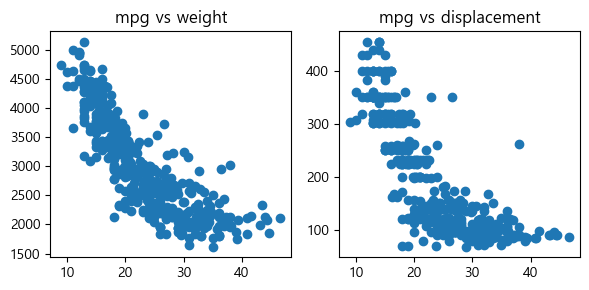

In [157]:
fig, axs = plt.subplots(1,2, figsize=(6,3), tight_layout=True)

axs[0].scatter(df.mpg, df.weight)
axs[0].set_title('mpg vs weight')

axs[1].scatter(df.mpg, df.displacement)
axs[1].set_title('mpg vs displacement')

plt.show()

## 5. 파이차트 : pie()

- 범주형 데이터의 빈도(비율)을 비교하기 위해 사용하는 차트
- 원의 형태를 유지할 수 있도록 다음 명령을 실행해야 함
    - plt.axis('equal')
    - 콘솔에서는 별 다른 변화 없으나 plot창에서는 필요함

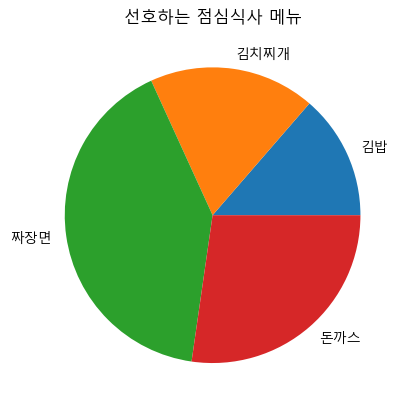

In [162]:
size = [15, 20, 45, 30]
labels = ['김밥','김치찌개','짜장면','돈까스']

plt.title('선호하는 점심식사 메뉴')
plt.pie(size, labels=labels)

plt.show()

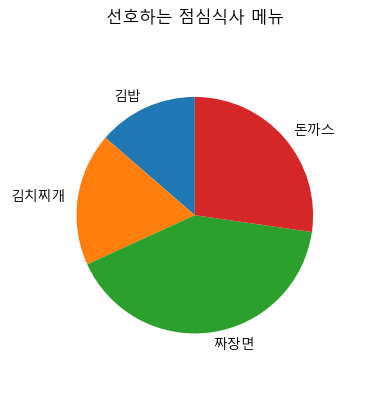

In [164]:
plt.title('선호하는 점심식사 메뉴')
plt.pie(size, labels=labels, startangle=90, radius=0.8)

plt.show()

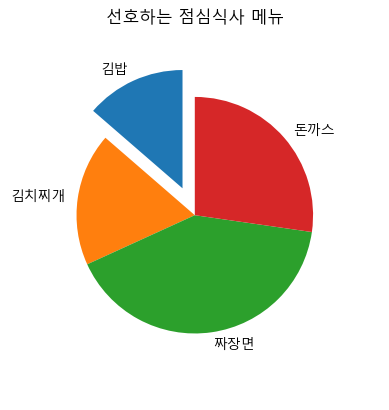

In [165]:
plt.title('선호하는 점심식사 메뉴')
plt.pie(size, labels=labels, startangle=90, radius=0.8,
       explode=[0.2,0,0,0])

plt.show()

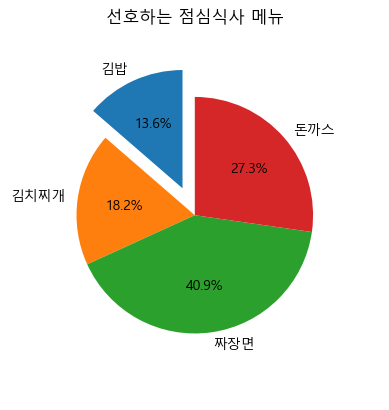

In [170]:
plt.title('선호하는 점심식사 메뉴')
plt.pie(size, labels=labels, startangle=90, radius=0.8,
       explode=[0.2,0,0,0], autopct='%.1f%%')

plt.show()

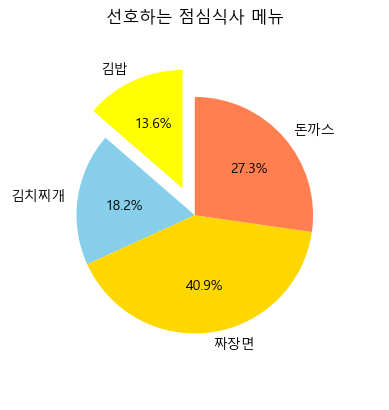

In [173]:
plt.title('선호하는 점심식사 메뉴')
plt.pie(size, labels=labels, startangle=90, radius=0.8,
       explode=[0.2,0,0,0], autopct='%.1f%%',
       colors=['yellow','skyblue','gold','coral'])

plt.show()

#### 문제. auto 데이터셋에서 cylinders, origin에 대한 pie 차트

In [196]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [209]:
df_cylinders = df.cylinders.value_counts().sort_index()
df_origin =  df.origin.value_counts().sort_index()

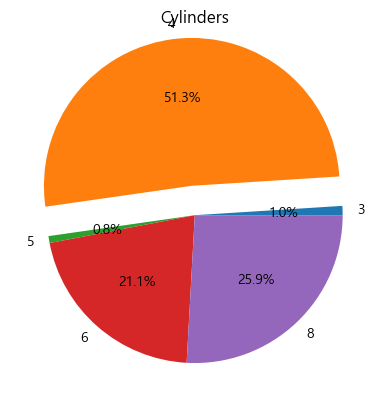

In [211]:
plt.title('Cylinders')
plt.pie(df_cylinders.values, labels = df_cylinders.index,
       explode=[0,0.2,0,0,0], autopct='%.1f%%')

plt.show()

In [201]:
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

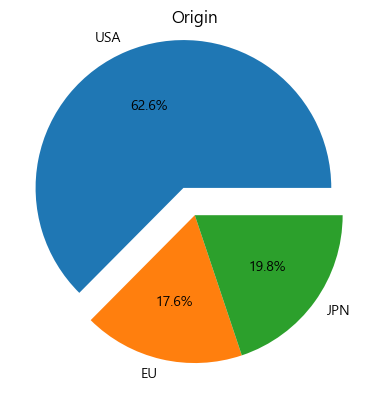

In [212]:
plt.title('Origin')
plt.pie(df_origin.values, explode=[0.2,0,0] , 
        autopct='%.1f%%', labels = ['USA','EU','JPN'])

plt.show()

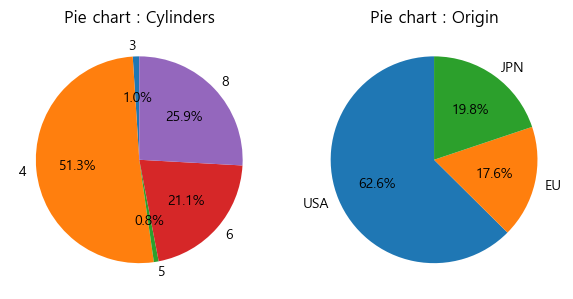

In [215]:
fig, axs = plt.subplots(1,2, figsize=(6,3), tight_layout=True)

axs[0].pie(df_cylinders, labels=df_cylinders.index, 
           startangle=90, autopct='%.1f%%')
axs[0].set_title('Pie chart : Cylinders')

axs[1].pie(df_origin, labels = ['USA','EU','JPN'] , 
           startangle=90, autopct='%.1f%%')
axs[1].set_title('Pie chart : Origin')

plt.show()

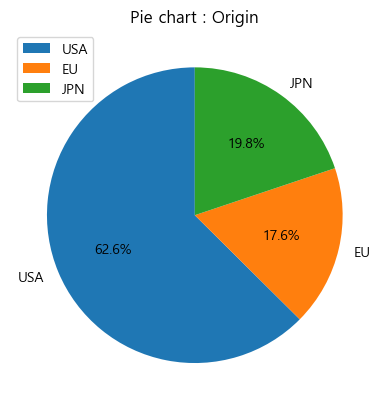

In [216]:
plt.pie(df_origin, labels = ['USA','EU','JPN'] , 
           startangle=90, autopct='%.1f%%')
plt.title('Pie chart : Origin')
plt.legend()
plt.show()

-----